<a href="https://colab.research.google.com/github/De78-cyber/Transfer_learning_Desafio/blob/main/Matriz_de_Confus%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd



In [3]:
tf.__version__
'2.0.0-betal'

'2.0.0-betal'

In [4]:
%load_ext tensorboard

In [6]:
logdir= 'log'

In [5]:
(train_images, train_labels), (test_images, test_labels)= datasets.mnist.load_data()
train_images= train_images.reshape((60000, 28, 28, 1))
test_images= test_images.reshape((10000, 28, 28, 1))

train_images = train_images /255.0
test_images = test_images /255.0

classes=[0,1,2,3,4,5,6,7,8,9]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
model= models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation= 'relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64,(3, 3), activation= 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64,(3, 3)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
tensorboard_callback= tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x= train_images,
           y=train_labels,
           epochs=5,
           validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.9050 - loss: 0.3087 - val_accuracy: 0.9843 - val_loss: 0.0475
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9855 - loss: 0.0474 - val_accuracy: 0.9897 - val_loss: 0.0337
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9896 - loss: 0.0322 - val_accuracy: 0.9910 - val_loss: 0.0300
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9913 - loss: 0.0277 - val_accuracy: 0.9906 - val_loss: 0.0307
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9938 - loss: 0.0206 - val_accuracy: 0.9901 - val_loss: 0.0363


In [13]:
y_true=test_labels
y_pred_probs = model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [14]:
classes=[0,1,2,3,4,5,6,7,8,9]

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


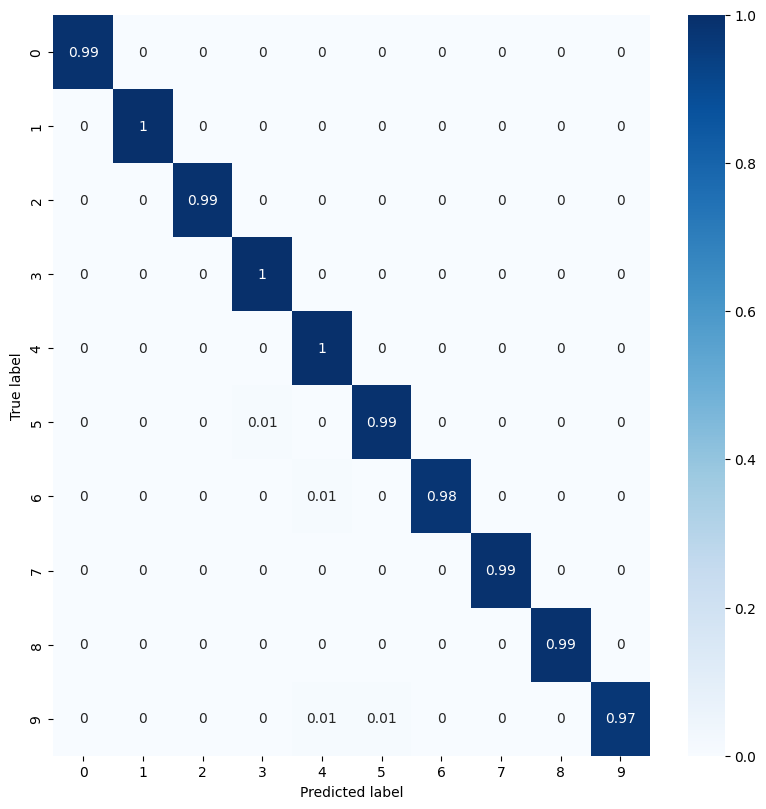

In [15]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1) [:, np.newaxis], decimals=2)

unique_true = np.unique(y_true)
unique_pred = np.unique(y_pred)

print(unique_true)
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

unique_true = np.unique(y_true)
unique_pred = np.unique(y_pred)

print(unique_true)
print(unique_pred)

classes = sorted(list(set(unique_true) | set(unique_pred)))

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns =classes)


figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [16]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32,(3, 3), activation= 'relu', input_shape=(28,28,1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64,(3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64,(3, 3)))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation= 'relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test, y_test)= mnist.load_data()
x_train= x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32')/255
x_test= x_test.reshape((x_test.shape[0], 28, 28,1)).astype('float32')/255




In [23]:
history= model1.fit(x_train, y_train, epochs= 10, batch_size= 64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 62ms/step - accuracy: 0.8863 - loss: 0.3805 - val_accuracy: 0.9837 - val_loss: 0.0541
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 60ms/step - accuracy: 0.9830 - loss: 0.0561 - val_accuracy: 0.9850 - val_loss: 0.0477
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.9884 - loss: 0.0379 - val_accuracy: 0.9907 - val_loss: 0.0309
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9910 - loss: 0.0286 - val_accuracy: 0.9882 - val_loss: 0.0342
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.9927 - loss: 0.0234 - val_accuracy: 0.9895 - val_loss: 0.0314
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.9938 - loss: 0.0186 - val_accuracy: 0.9882 - val_loss: 0.0380
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 59ms/step - accuracy: 0.9945 - loss: 0.0160 - val_accuracy: 0.9910 - val_loss: 0.0314
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9955 - loss: 0.0140 - 

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [28]:
y_pred= model1.predict(x_test)
y_pred_classes= np.argmax(y_pred, axis= 1)
conf_mat = confusion_matrix(y_test, y_pred_classes)
accuracy= accuracy_score(y_test, y_pred_classes)
sensibilidade= recall_score(y_test, y_pred_classes, average='weighted')
precisao= precision_score(y_test, y_pred_classes, average='weighted')
f_score= f1_score(y_test, y_pred_classes, average='weighted')
tn= conf_mat.sum()- conf_mat.sum(axis= 1)- conf_mat.sum(axis=0)+ np.diag(conf_mat)
specificity= np.mean(tn/tn + conf_mat.sum(axis= 1)- np.diag(conf_mat))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [29]:
print(f'Acurácia:{accuracy:.4f}')
print(f'Sensibilidade: (Recall): {sensibilidade:.4f}')
print(f'Precisão: {precisao:.4f}')
print(f'Especificidade: {specificity:.4f}')
print(f'F-score: {f_score:.4f}')

Acurácia:0.9886
Sensibilidade: (Recall): 0.9886
Precisão: 0.9887
Especificidade: 12.4000
F-score: 0.9886


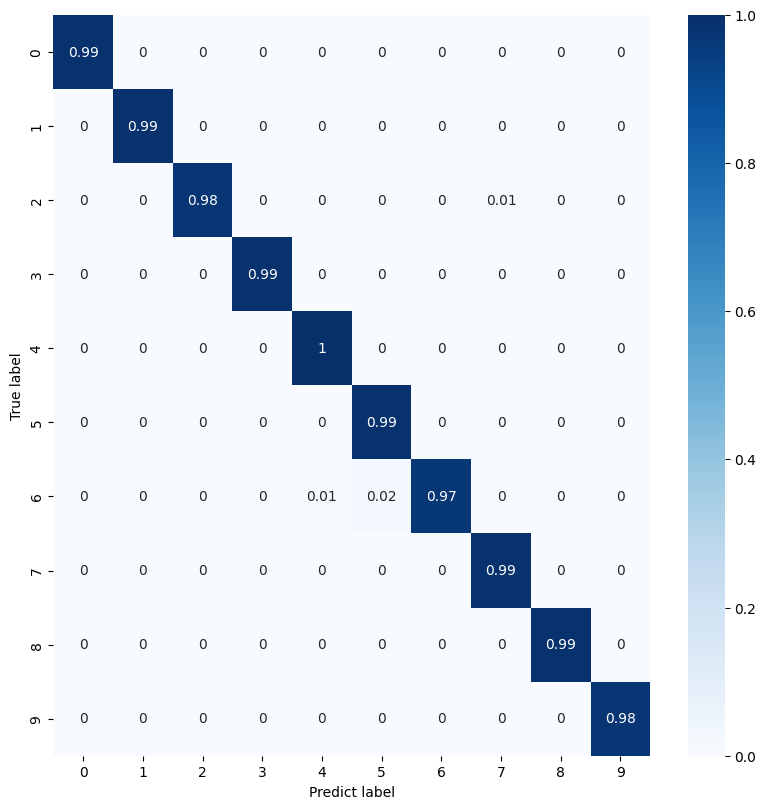

In [32]:
con_mat_norm = np.around(conf_mat.astype('float')/ conf_mat.sum(axis= 1)[:, np.newaxis],decimals=2)
classes= [0,1,2,3,4,5,6,7,8,9,]
con_mat_df= pd.DataFrame(con_mat_norm, index=classes, columns=classes)
plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predict label')
plt.show()